## Preambule

In [2]:
# General packages
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path
import xarray as xr
from matplotlib import colors
import json

# Plotting
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.colors import n_colors

## Paths

In [3]:
path_data = Path("K:/Data/Data_EffortSharing/DataUpdate_ongoing/")

## Read data files

In [4]:
xr_dataread = xr.open_dataset(path_data / "startyear_2021/xr_dataread.nc")
all_regions_iso = np.load(path_data / "all_regions.npy")
all_regions_names = np.load(path_data / "all_regions_names.npy")
all_countries_iso = np.load(path_data / "all_countries.npy", allow_pickle=True)
all_countries_names = np.load(path_data / "all_countries_names.npy", allow_pickle=True)

In [5]:
df = pd.read_excel(Path("X:/user/dekkerm/Data/") / "UNFCCC_Parties_Groups_noeu.xlsx", sheet_name = "Country groups")
countries_iso2 = np.array(df["Country ISO Code"])
group_ldc = countries_iso2[np.array(df["LDC"]) == 1]
group_hdc = countries_iso2[np.array(df["HICO"]) == 1]

In [6]:
df = pd.read_excel("X:/user/dekkerm/Data/UNFCCC_Parties_Groups_noeu.xlsx", sheet_name = "Country groups")
countries_iso = np.array(df["Country ISO Code"])
group_cvf = countries_iso[np.array(df["CVF (24/10/22)"]) == 1]
group_g20 = countries_iso[np.array(df["G20"]) == 1]
group_eu = countries_iso[np.array(df["EU"]) == 1]
group_g7 = countries_iso[np.array(df["G7"]) == 1]
group_na = countries_iso[np.array(df["Northern America"]) == 1]
group_um = countries_iso[np.array(df["Umbrella"]) == 1]
group_au = countries_iso[np.array(df["Australasia"]) == 1]
group_af = countries_iso[np.array(df["African Group"]) == 1]
group_sids = countries_iso[np.array(df["SIDS"]) == 1]
xr_alloc_2030 = xr.open_dataset(path_data / "startyear_2021/Aggregated_files/xr_alloc_2030_GHG_incl.nc")
xr_alloc_2040 = xr.open_dataset(path_data / "startyear_2021/Aggregated_files/xr_alloc_2040_GHG_incl.nc")
group_ldc = countries_iso[np.array(df["LDC"]) == 1]
group_eg = countries_iso[np.array(df["European Group"]) == 1]

In [7]:
xr_allocs = {}
for cty in ['EU', 'USA', 'IND', 'CHN', 'BRA', 'ZAF']:
    xr_allocs[cty] = xr.open_dataset(path_data / "startyear_2021" / "Allocations_GHG_incl" / ("xr_alloc_"+cty+".nc"))

## Figure illustration

In [8]:
settings_specific = {'Temperature': 1.6,
                    'Risk': 0.5,
                    'NegEmis': 0.5,
                    'NonCO2red': 0.5,
                    'Timing': "Immediate",
                    'Convergence_year': 2050,
                   'Scenario': 'SSP2',
                   'Discount_factor': 0,
                   'Historical_startyear': 1990,
                   'Capability_threshold': "Th",
                   'RCI_weight': "Half"}

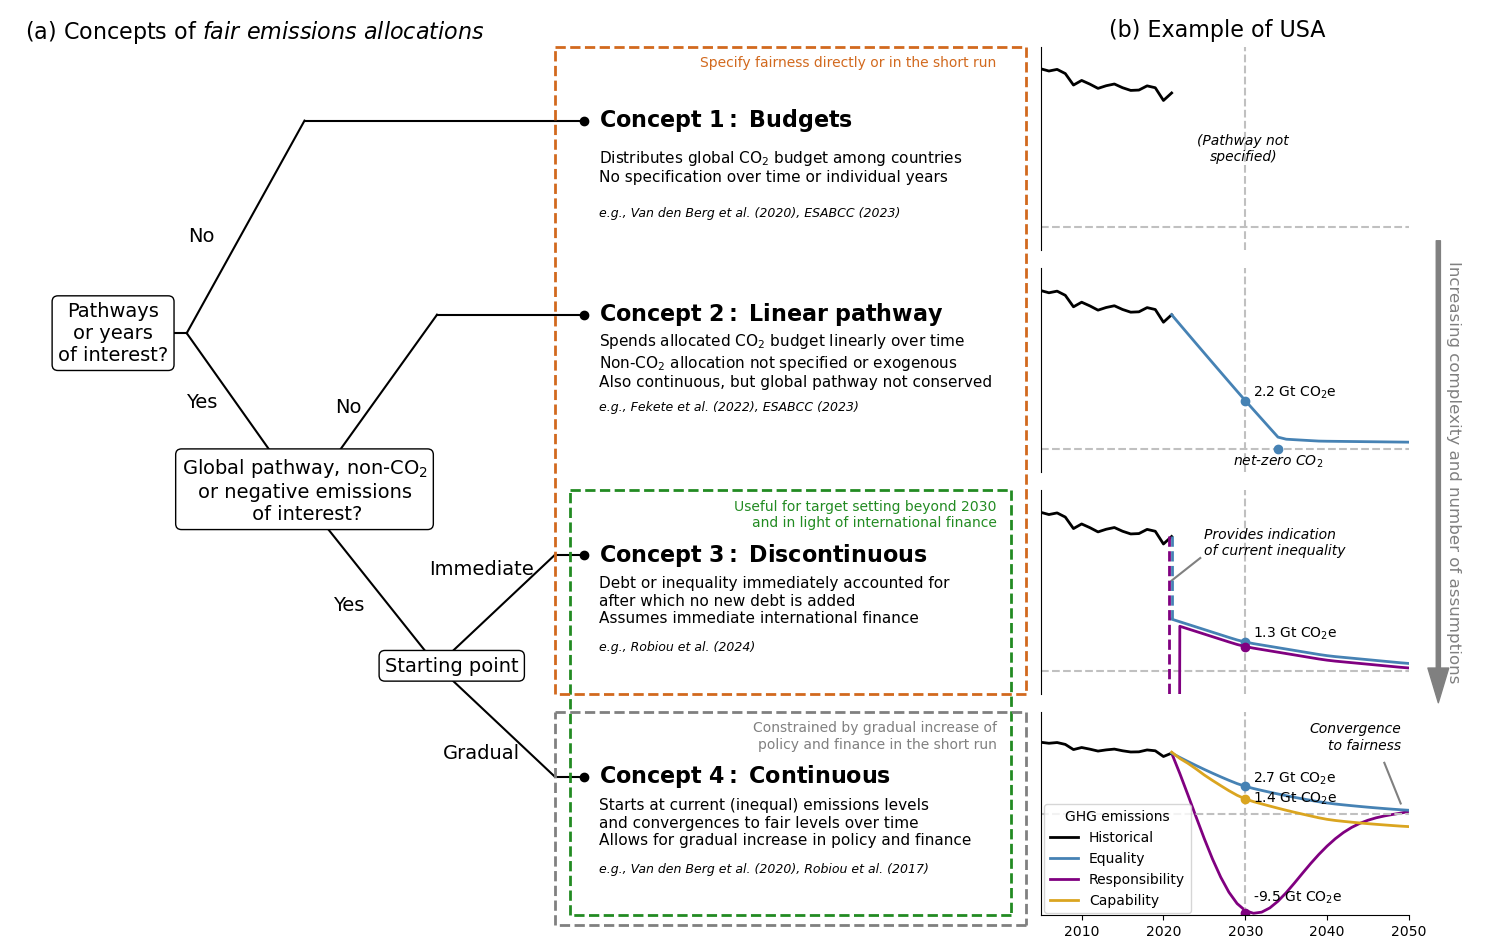

In [206]:
input_region = 'USA'

fig, ax = plt.subplots(1, 1, figsize=(19, 12), gridspec_kw={'wspace': 0, 'hspace': 0})

for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Panel A
t_y = 0.65
t_y2 = 0.47
t_y3 = 0.29
# ax.text(
#     0.01, 0.99, '(a)',
#     transform=ax.transAxes,  # Use Axes coordinates (0=left, 1=right for x; 0=bottom, 1=top for y)
#     fontsize=16,
#     verticalalignment='top', 
#     horizontalalignment='left'
# )
ax.text(
    0.01, 0.99, "(a) Concepts of "+r"$\it{fair\ emissions\ allocations}$",
    transform=ax.transAxes,  # Use Axes coordinates (0=left, 1=right for x; 0=bottom, 1=top for y)
    fontsize=16,
    verticalalignment='top', 
    horizontalalignment='left',
)

lw = 11
(y1, y2, y3, y4) = (0.88, 0.67, 0.41, 0.17)

# Boxes
ax.text(0.07, 0.65, 'Pathways\nor years\nof interest?', transform=ax.transAxes, fontsize=14, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
ax.text(0.20, 0.48, 'Global pathway, non-CO$_2$\nor negative emissions\n of interest?', transform=ax.transAxes, fontsize=14, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
ax.text(0.3, 0.29, 'Starting point', transform=ax.transAxes, fontsize=14, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))

# Lines and answers
ax.plot([0.07, 0.12], [t_y, t_y], 'k')
ax.plot([0.12, 0.2], [t_y, y1], 'k')
ax.plot([0.12, 0.2], [t_y, t_y2], 'k')
ax.text(0.13, 0.755, 'No', transform=ax.transAxes, fontsize=14, verticalalignment='center',horizontalalignment='center')#, rotation=72)
ax.text(0.13, 0.575, 'Yes', transform=ax.transAxes, fontsize=14, verticalalignment='center', horizontalalignment='center')#, rotation=-42)

ax.plot([0.2, 0.29], [t_y2, y2], 'k')
ax.plot([0.2, 0.29], [t_y2, t_y3], 'k')
ax.text(0.23, 0.57, 'No', transform=ax.transAxes, fontsize=14, verticalalignment='center',horizontalalignment='center')#, rotation=64)
ax.text(0.23, 0.355, 'Yes', transform=ax.transAxes, fontsize=14, verticalalignment='center', horizontalalignment='center')#, rotation=-55)

ax.plot([0.29, 0.37], [t_y3, y3], 'k')
ax.plot([0.29, 0.37], [t_y3, y4], 'k')
ax.text(0.32, 0.395, 'Immediate', transform=ax.transAxes, fontsize=14, verticalalignment='center',horizontalalignment='center')#, rotation=72)
ax.text(0.32, 0.195, 'Gradual', transform=ax.transAxes, fontsize=14, verticalalignment='center', horizontalalignment='center')#, rotation=-65)

ax.plot([0.2, 0.39], [y1, y1], 'k')
ax.plot([0.39], [y1], 'ko')
ax.text(0.4, y1, r'$\mathbf{Concept\ 1:\ Budgets}$', transform=ax.transAxes, fontsize=16, verticalalignment='center',  horizontalalignment='left')
ax.text(0.4, y1-0.05, 'Distributes global CO$_2$ budget among countries\nNo specification over time or individual years', transform=ax.transAxes, fontsize=lw, verticalalignment='center',  horizontalalignment='left')
ax.text(0.4, y1-0.1, 'e.g., Van den Berg et al. (2020), ESABCC (2023)', fontstyle='italic', transform=ax.transAxes, fontsize=9, verticalalignment='center',  horizontalalignment='left')

ax.plot([0.29, 0.39], [y2,y2], 'k')
ax.plot([0.39], [y2], 'ko')
ax.text(0.4, y2, r'$\mathbf{Concept\ 2:\ Linear\ pathway}$', transform=ax.transAxes, fontsize=16, verticalalignment='center',  horizontalalignment='left')
ax.text(0.4, y2-0.05, 'Spends allocated CO$_2$ budget linearly over time\nNon-CO$_2$ allocation not specified or exogenous\nAlso continuous, but global pathway not conserved', transform=ax.transAxes, fontsize=lw, verticalalignment='center',  horizontalalignment='left')
ax.text(0.4, y2-0.1, 'e.g., Fekete et al. (2022), ESABCC (2023)', fontstyle='italic', transform=ax.transAxes, fontsize=9, verticalalignment='center',  horizontalalignment='left')

ax.plot([0.37, 0.39], [y3, y3], 'k')
ax.plot([0.39], [y3], 'ko')
ax.text(0.4, y3, r'$\mathbf{Concept\ 3:\ Discontinuous}$', transform=ax.transAxes, fontsize=16, verticalalignment='center',  horizontalalignment='left')
ax.text(0.4, y3-0.05, "Debt or inequality immediately accounted for\nafter which no new debt is added\nAssumes immediate international finance", transform=ax.transAxes, fontsize=lw, verticalalignment='center',  horizontalalignment='left')
ax.text(0.4, y3-0.1, 'e.g., Robiou et al. (2024)', fontstyle='italic', transform=ax.transAxes, fontsize=9, verticalalignment='center',  horizontalalignment='left')

ax.plot([0.37, 0.39], [y4, y4], 'k')
ax.plot([0.39], [y4], 'ko')
ax.text(0.4, y4, r'$\mathbf{Concept\ 4:\ Continuous}$', transform=ax.transAxes, fontsize=16, verticalalignment='center',  horizontalalignment='left')
ax.text(0.4, y4-0.05, 'Starts at current (inequal) emissions levels\nand convergences to fair levels over time\nAllows for gradual increase in policy and finance', transform=ax.transAxes, fontsize=lw, verticalalignment='center',  horizontalalignment='left')
ax.text(0.4, y4-0.1, 'e.g., Van den Berg et al. (2020), Robiou et al. (2017)', fontstyle='italic', transform=ax.transAxes, fontsize=9, verticalalignment='center',  horizontalalignment='left')

# Panel B
ax.text(
    0.82, 0.99, '(b) Example of '+input_region,
    transform=ax.transAxes,  # Use Axes coordinates (0=left, 1=right for x; 0=bottom, 1=top for y)
    fontsize=16,
    verticalalignment='top', 
    horizontalalignment='center'
)
for i in range(4):

    inset_ax = ax.inset_axes([0.70, 0.74-0.24*i, 0.25, 0.22])
    
    hist = xr_dataread.GHG_hist.sel(Region=input_region).sel(Time=np.arange(2005, 2022))
    inset_ax.plot(hist.Time, hist, lw=2, color='black', label='Historical')
    inset_ax.spines['top'].set_visible(False)
    inset_ax.spines['right'].set_visible(False)
    if i != 3: inset_ax.spines['bottom'].set_visible(False)
    if i != 3: inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_xlim([2005, 2050])
    if i == 3: inset_ax.set_ylim([-10e3, 10e3])
    else: inset_ax.set_ylim([-1e3, 8e3])
    inset_ax.axvline(x=2030, color='silver', linestyle='--')
    inset_ax.axhline(y=0, color='silver', linestyle='--')

    if i == 0:
        # inset_ax.text(
        #     0.55, 0.5, '?',
        #     transform=inset_ax.transAxes,  # Use Axes coordinates (0=left, 1=right for x; 0=bottom, 1=top for y)
        #     fontsize=35,
        #     verticalalignment='center', 
        #     horizontalalignment='center'
        # )
        inset_ax.text(
            0.55, 0.5, '(Pathway not\nspecified)',
            transform=inset_ax.transAxes,  # Use Axes coordinates (0=left, 1=right for x; 0=bottom, 1=top for y)
            fontsize=10,
            fontstyle='italic',
            verticalalignment='center', 
            horizontalalignment='center'
        )
    
    if i == 2:
        inset_ax.plot([2021, 2024.5], [4e3, 5e3], 'grey')
        inset_ax.text(2025, 5e3, 'Provides indication\nof current inequality',fontstyle='italic', color='k', verticalalignment='bottom', fontsize=10)
    if i == 1:
        inset_ax.text(2049, -9e3, 'Negative budgets cannot\nbe expressed this way',fontstyle='italic', color='k', verticalalignment='bottom', horizontalalignment='right', fontsize=10)
    if i == 3:
        inset_ax.plot([2047, 2049], [5e3, 1e3], 'grey')
        inset_ax.text(2049, 9e3, 'Convergence\nto fairness',fontstyle='italic',  color='k', verticalalignment='top', horizontalalignment='right', fontsize=10)

    if i >= 1:
        alloc = [xr_allocs[input_region].sel(**settings_specific)['PCB_lin'],
                 xr_allocs[input_region].sel(**settings_specific)['PC'],
                 xr_allocs[input_region].sel(**settings_specific)['PCC']][i-1]
        inset_ax.plot(alloc.Time, alloc, lw=2, color='steelblue', label='Equality')
        if i == 2: inset_ax.plot([2021, 2021], [hist.sel(Time=2021), alloc.sel(Time=2021)], '--', lw=2, color='steelblue')
        inset_ax.plot([2030], [alloc.sel(Time=2030)], 'o', lw=2, color='steelblue')
        #red = 1-alloc / hist.sel(Time=2015)
        inset_ax.text(2031, alloc.sel(Time=2030), str(np.round(float(alloc.sel(Time=2030))/1000,1))+' Gt CO$_2$e', color='black', verticalalignment='bottom', fontsize=10)


        alloc = [xr_allocs[input_region].sel(**settings_specific)['PCB_lin'],
                 xr_allocs[input_region].sel(**settings_specific)['PC'],
                 xr_allocs[input_region].sel(**settings_specific)['ECPC']][i-1]
        if i == 2:
             debt = xr_allocs[input_region].sel(**settings_specific)['ECPC'].sel(Time=np.arange(2021, 2051)).sum(dim='Time') - xr_allocs[input_region].sel(**settings_specific)['PC'].sel(Time=np.arange(2021, 2051)).sum(dim='Time')
             alloc.loc[{'Time': 2021}] = debt
             inset_ax.plot([2021-0.35, 2021-0.35], [hist.sel(Time=2021), alloc.sel(Time=2021)], '--', lw=2, color='purple')
            #  inset_ax.plot([2020-0.35, 2022-0.35], [hist.sel(Time=2021), hist.sel(Time=2021)], lw=2, color='steelblue')
            #  inset_ax.plot([2020-0.35, 2022-0.35], [alloc.sel(Time=2021), alloc.sel(Time=2021)], lw=2, color='steelblue')
        if i == 3: inset_ax.plot(alloc.Time, alloc, lw=2, color='purple', label='Responsibility', zorder=-1e9)
        elif i == 2: inset_ax.plot(alloc.Time, alloc-200, lw=2, color='purple', label='Responsibility')

        if i == 2 or i == 3:
            inset_ax.plot([2030], [alloc.sel(Time=2030)-2e2], 'o', lw=2, color='purple')
            if i == 3: inset_ax.text(2031, alloc.sel(Time=2030)+5e2, str(np.round(float(alloc.sel(Time=2030))/1000,1))+' Gt CO$_2$e', color='black', verticalalignment='bottom', fontsize=10)

        if i == 3:
            alloc = xr_allocs[input_region].sel(**settings_specific)['AP']
            inset_ax.plot(alloc.Time, alloc, lw=2, color='goldenrod', label='Capability')
            inset_ax.plot([2030], [alloc.sel(Time=2030)], 'o', lw=2, color='goldenrod')
            inset_ax.text(2031, alloc.sel(Time=2030), str(np.round(float(alloc.sel(Time=2030))/1000,1))+' Gt CO$_2$e', color='black', verticalalignment='center', fontsize=10)
            inset_ax.legend(loc=(0.01, 0.01), title='GHG emissions')

    # Net zero year
    if i == 1:
        inset_ax.plot([2034], [0], 'o', lw=1, color='steelblue')
        inset_ax.text(2034, -2e2, 'net-zero CO$_2$',fontstyle='italic', verticalalignment='top', horizontalalignment='center', fontsize=10)

ax.annotate('',
            # xy=(0.97, 0.01), xytext=(0.97, 0.95),
            xy=(0.97, 0.25), xytext=(0.97, 0.75),
            arrowprops=dict(color='grey', width=3, headwidth=15, headlength=25))
ax.text(0.98, 0.5, 'Increasing complexity and number of assumptions', transform=ax.transAxes, fontsize=12, color='grey', verticalalignment='center', rotation=-90, horizontalalignment='center')

# Plot boxes in the figure
(p1, p2, p3, p4) = (0.38, 0.02), (0.38, 0.48), (0.68, 0.02), (0.68, 0.48)
ax.text(0.67, 0.47, 'Useful for target setting beyond 2030\nand in light of international finance', fontsize=10, verticalalignment='top', horizontalalignment='right', color='forestgreen')
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'forestgreen', lw=2, linestyle='--')
ax.plot([p4[0], p3[0]], [p4[1], p3[1]], 'forestgreen', lw=2, linestyle='--')
ax.plot([p2[0], p4[0]], [p2[1], p4[1]], 'forestgreen', lw=2, linestyle='--')
ax.plot([p3[0], p1[0]], [p3[1], p1[1]], 'forestgreen', lw=2, linestyle='--')

# (p1, p2, p3, p4) = (0.38, 0.46), (0.38, 0.92), (0.68, 0.46), (0.68, 0.92)
# ax.text(0.67, 0.91, 'Most intuitive to determine net-zero CO$_2$ year', fontsize=10, verticalalignment='top', horizontalalignment='right', color='forestgreen')
# ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'forestgreen', lw=2, linestyle='--')
# ax.plot([p4[0], p3[0]], [p4[1], p3[1]], 'forestgreen', lw=2, linestyle='--')
# ax.plot([p2[0], p4[0]], [p2[1], p4[1]], 'forestgreen', lw=2, linestyle='--')
# ax.plot([p3[0], p1[0]], [p3[1], p1[1]], 'forestgreen', lw=2, linestyle='--')

(p1, p2, p3, p4) = (0.37, 0.26), (0.37, 0.96), (0.69, 0.26), (0.69, 0.96)
ax.text(0.67, 0.95, 'Specify fairness directly or in the short run', fontsize=10, verticalalignment='top', horizontalalignment='right', color='chocolate')
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'chocolate', lw=2, linestyle='--')
ax.plot([p4[0], p3[0]], [p4[1], p3[1]], 'chocolate', lw=2, linestyle='--')
ax.plot([p2[0], p4[0]], [p2[1], p4[1]], 'chocolate', lw=2, linestyle='--')
ax.plot([p3[0], p1[0]], [p3[1], p1[1]], 'chocolate', lw=2, linestyle='--')

(p1, p2, p3, p4) = (0.37, 0.01), (0.37, 0.24), (0.69, 0.01), (0.69, 0.24)
ax.text(0.67, 0.23, 'Constrained by gradual increase of\npolicy and finance in the short run', fontsize=10, verticalalignment='top', horizontalalignment='right', color='grey')
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'grey', lw=2, linestyle='--')
ax.plot([p4[0], p3[0]], [p4[1], p3[1]], 'grey', lw=2, linestyle='--')
ax.plot([p2[0], p4[0]], [p2[1], p4[1]], 'grey', lw=2, linestyle='--')
ax.plot([p3[0], p1[0]], [p3[1], p1[1]], 'grey', lw=2, linestyle='--')

plt.savefig("K:/Code/effort-sharing/Figures/Paper_FairShares/V2/Figure_1.png", dpi=300, bbox_inches='tight')